# Analyse exploratoire du dataset :

Dataset enregistré dans l'emplacement : `data/raw/admission.csv`  

Téléchargé depuis le lien : [https://assets-datascientest.s3.eu-west-1.amazonaws.com/MLOPS/bentoml/admission.csv](https://assets-datascientest.s3.eu-west-1.amazonaws.com/MLOPS/bentoml/admission.csv)

In [1]:
import pandas as pd
import os

In [2]:
# Path

raw_path = os.path.join("..", "data", "raw/")

In [3]:
# Import data

df = pd.read_csv(raw_path + "admission.csv", index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Verify NAN

df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# Verify duplicates

df.duplicated().sum()

np.int64(0)

In [6]:
# Verify types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [7]:
# Describe dataset

df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<Axes: >

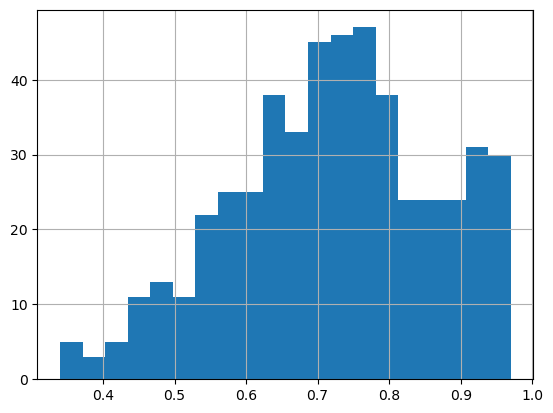

In [9]:
# Target distribution

df['Chance of Admit '].hist(bins=20)

**Commentaires :**  
* Pas de manquants
* Pas de doublons
* Typage OK
* Pas d'outlier


**Notes :**  
* Normalisation à réaliser
* Ajout fonction pour renommer les features


In [12]:
import re

def rename_features(df):
    r1 = re.compile(r'^\s+|\s+$')
    r2 = re.compile(r'\s+')
    cols = df.columns.tolist()
    new_cols = []
    print(cols)
    for col in cols:
        c = col.lower()
        c = r1.sub('', c)
        c = r2.sub('_', c)
        new_cols.append(c)
    df = df.copy()
    print(new_cols)
    df.columns = new_cols
    return df


In [13]:
rename_features(df)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93
